### О наборе данных
#### Описание данных
##### Существует 3 типа входных функций:

* Цель: фактическая информация;
* Обследование: результаты медицинского обследования;
* Субъективный: информация, предоставленная пациентом.

##### Характеристики:

* __age__ - Объективная характеристика (возраст int (дни))
* __heught__ -  Объективная характеристика (рост int (см))
* __weught__ - Объективная характеристика (вес float (кг))
* __gender__ - Объективный признак (пол  категориальный признак)
* __ap_hi__ - Систолическое (верхнее) артериальное давление (функция обследования ap_hi (int))
* __ap_lo__ - Диастолическое (нижнее) артериальное давление (функция обследования ap_lo (int))
* __cholesterol__ - Характеристика обследования (холестерин 1: нормальный, 2: выше нормы, 3: значительно выше нормы)
* __gluc__ - Характеристика обследования (gluc  1: нормальная, 2: выше нормы, 3: значительно выше нормы)
* __smoke__ - Субъективная характеристика (курение (binary))
* __alco__ - Потребление алкоголя (cубъективная характеристика (binary))
* __active__ - Физическая активность (cубъективная характеристика (двоичная))
* __cardio__ - Наличие или отсутствие сердечно-сосудистых заболеваний (Целевая переменная (двоичная))

##### Все значения набора данных были собраны в момент медицинского обследования.

#### Задание курсового проекта:
##### В заданном датасете рассчитать и выполнить выборку давления верхнее или нижнее для мужчин и женщин и протестировать, есть ли статистические значимые различия. 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('cardio_train.csv', delimiter=';', index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [41]:
# преобразование возраста пациента в целые года
df['age'] = df['age']/365 
df = df.astype({'age': np.int})
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [42]:
# создание dataframe для выполнения курсового задания (dfw) - нам понадобяться два признака. Выбираем пол и Верхнее давление.
dfw = df[['gender', 'ap_hi']]
dfw.head()

,gender,ap_hi
id,,
0,2,110
1,1,140
2,1,130
3,2,150
4,1,100


In [43]:
# ознакомимся с параметрами полуенного датафрейма
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  70000 non-null  int64
 1   ap_hi   70000 non-null  int64
dtypes: int64(2)
memory usage: 1.6 MB


In [44]:
# проверяем на наличие пустых значений
dfw.isna().sum()

gender    0
ap_hi     0
dtype: int64

In [45]:
# переводим категориальный признак к удобному виду
dfw['gender'] = dfw['gender'].apply({1: 'wom', 2: 'men'}.get)
dfw.head()

,gender,ap_hi
id,,
0,men,110
1,wom,140
2,wom,130
3,men,150
4,wom,100


In [46]:
# определяем статистический состав рабочего  датафрейма
dfw.describe()

,ap_hi
count,70000.000000
mean,128.817286
std,154.011419
min,-150.000000
25%,120.000000
50%,120.000000
75%,140.000000
max,16020.000000


###### проаналировав полученные данные, приходим к выводу, что в нашей совокупности данных, много ошибочных данных и выбросов. Для дальнейших действий необходимо датафрейм подготовить.

In [47]:
# проверяем отрицательные значения - что недопустимо.
rslt_dfm = dfw[dfw['ap_hi'] < 0]
print(rslt_dfm)

      gender  ap_hi
id                 
6525     wom   -100
22881    men   -115
29313    wom   -100
34295    wom   -140
36025    men   -120
50055    men   -150
66571    men   -120


In [48]:
# устраняем отрицательные значения - заменяя их на положительные, умножив на -1
dfw[(dfw.ap_hi < 0)] *= -1
# проверяем результат устранения отрицательных значений
rslt_dfm0 = dfw[dfw['ap_hi'] < 0]
print(rslt_dfm0)

Empty DataFrame
Columns: [gender, ap_hi]
Index: []


In [49]:
# определяем количество значений признака большей 10000 - что конечно же невозможно.
rslt_dfw100 = dfw[dfw['ap_hi'] >= 10000]
print(rslt_dfw100)

      gender  ap_hi
id                 
11089    wom  11500
36339    men  14020
36414    wom  14020
58374    wom  16020
66998    men  14020
67502    wom  14020
73356    men  11020
79116    wom  13010
79679    wom  13010


In [50]:
# исправляем слишком высокие показатели давления
dfw.loc[dfw["ap_hi"] > 10000, "ap_hi"] //= 100
# проверяем исправление
rslt_dfw100 = dfw[dfw['ap_hi'] >= 10000]
print(rslt_dfw100)

Empty DataFrame
Columns: [gender, ap_hi]
Index: []


In [51]:
# определяем количество значений признака большей 1000 - что так же невозможно.
rslt_dfw10 = dfw[dfw['ap_hi'] >= 1000]
print(rslt_dfw10)

      gender  ap_hi
id                 
12710    wom   1420
19827    wom   1500
36793    wom   1400
40239    men   1620
52725    men   1130
58728    wom   1202
61618    men   1400
61725    wom   1420
62154    wom   1300
69672    wom   1400
72539    men   1409
81769    men   1300
82660    wom   1110
91364    wom   1205
99089    wom   2000


In [52]:
# исправляем слишком высокие показатели давления
dfw.loc[dfw["ap_hi"] > 1000, "ap_hi"] //= 10
# проверяем исправление
rslt_dfw10 = dfw[dfw['ap_hi'] >= 1000]
print(rslt_dfw10)

Empty DataFrame
Columns: [gender, ap_hi]
Index: []


In [53]:
# результат выполних действий над датафреймом
dfw.describe()

,ap_hi
count,70000.000000
mean,126.867557
std,21.059927
min,1.000000
25%,120.000000
50%,120.000000
75%,140.000000
max,960.000000


##### Как видно датафрайм удалось подкорректировать. Однако, необходимо продолжить.

In [54]:
# продолжаем находить некорректные значения.
# находим и справляем значения давления от 10 до 20 - таких значений верхнего давления не бывает (у живого человека)
dfw[(dfw['ap_hi'] >= 10) & (dfw['ap_hi'] <= 20)]

,gender,ap_hi
id,,
815,wom,14
1294,men,14
1360,wom,11
2260,wom,12
2301,wom,14
...,...,...
98039,wom,12
98213,wom,14
98568,wom,14


In [55]:
dfw.loc[(dfw['ap_hi'] >= 10) & (dfw['ap_hi'] <= 20), 'ap_hi'] *=10

In [56]:
dfw[(dfw['ap_hi'] >= 10) & (dfw['ap_hi'] <= 20)]

,gender,ap_hi
id,,


In [57]:
# находим есть ли значения давления в интервале от 1 до 10
dfw[(dfw['ap_hi'] >= 1) & (dfw['ap_hi'] < 10)]

,gender,ap_hi
id,,
7657,wom,7
12494,men,1
60477,wom,1


In [58]:
# исправляем
dfw.loc[(dfw['ap_hi'] >= 1) & (dfw['ap_hi'] < 10), 'ap_hi'] +=100

In [59]:
# проверяем
dfw[(dfw['ap_hi'] >= 1) & (dfw['ap_hi'] < 10)]

,gender,ap_hi
id,,


In [60]:
# находим есть ли значения давления в интервале от 200 до 999
dfw[(dfw['ap_hi'] > 200) & (dfw['ap_hi'] < 999)]

,gender,ap_hi
id,,
1863,men,220
2654,wom,902
2845,men,906
3026,men,210
3208,wom,220
...,...,...
94377,men,220
96686,men,240
97963,men,220


In [61]:
# заменим на медиану датафрейма
dfw.loc[(dfw['ap_hi'] > 200) & (dfw['ap_hi'] < 999), 'ap_hi'] = dfw['ap_hi'].median()

In [62]:
# проверяем
dfw[(dfw['ap_hi'] > 200) & (dfw['ap_hi'] < 999)]

,gender,ap_hi
id,,


In [63]:
dfw[(dfw['ap_hi'] > 20) & (dfw['ap_hi'] <= 99)]

,gender,ap_hi
id,,
71,wom,90
255,wom,90
288,men,80
491,wom,90
543,wom,80
...,...,...
99783,wom,90
99806,wom,90
99861,wom,90


In [64]:
# исправляем
dfw.loc[(dfw['ap_hi'] > 20) & (dfw['ap_hi'] <= 99), 'ap_hi'] = dfw['ap_hi'].median()

In [65]:
#len(dfw['ap_hi'].unique())
#dfw[dfw.marks == 1]

In [66]:
#print(*(dfw.ap_hi.value_counts() == 1))

In [67]:
#dfw.value_counts()

In [68]:
# проверяем готовность датафрейма
dfw.describe()

,ap_hi
count,70000.000000
mean,127.433829
std,16.174385
min,100.000000
25%,120.000000
50%,120.000000
75%,140.000000
max,200.000000


In [69]:
# разделим датафрейм по гендерному признаку
df_wom = dfw[dfw['gender'] == 'wom']
df_wom.head()

,gender,ap_hi
id,,
1,wom,140
2,wom,130
4,wom,100
8,wom,120
9,wom,130


In [70]:
df_men = dfw[dfw['gender'] == 'men']
df_men.head()

,gender,ap_hi
id,,
0,men,110
3,men,150
12,men,130
16,men,120
18,men,120


In [71]:
df_wom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45527 entries, 1 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  45527 non-null  object
 1   ap_hi   45527 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [72]:
df_men.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24466 entries, 0 to 99996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  24466 non-null  object
 1   ap_hi   24466 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 573.4+ KB


<AxesSubplot:xlabel='ap_hi', ylabel='Count'>

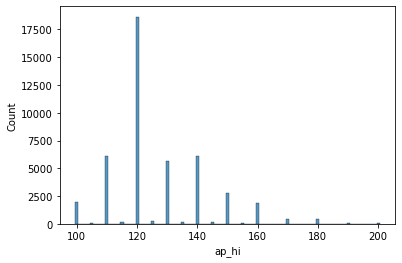

In [93]:
# проверим насколько полученные распределения генеральной совокупности по половому признаку 
#соответсвуют нормальному распределению
import seaborn as sns
sns.histplot(x=df_wom['ap_hi'], discrete=True)
#sns.histplot(x=df_men['ap_hi'], color='red', discrete=True)

<AxesSubplot:xlabel='ap_hi', ylabel='Count'>

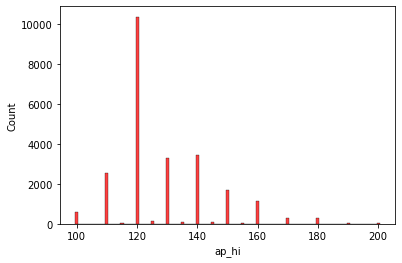

In [94]:
sns.histplot(x=df_men['ap_hi'], color='red', discrete=True)

In [83]:
# рассчитаем среднее, дисперсии и стандартное отклонение выборок по гендерному признаку
import statistics as s
mean_wom = np.average(df_wom['ap_hi']) #среднее генеральной совокупности женского пола
D_wom = s.pvariance(df_wom['ap_hi']) # дисперсия генеральной совокупности выборки женщинского пола
d_wom = s.variance(df_wom['ap_hi']) # дисперсия выборки женского пола
std_wom =s.stdev(df_wom['ap_hi'])
print('Статистические параметры выборки женского пола')
print(f'Среднее: {round(mean_wom, 2)}, Дисперсия гс: {round(D_wom, 2)}, Дисперсия выборки: {round(d_wom, 2)}, Стандартное оклонение: {round(std_wom, 2)}')

Статистические параметры выборки женского пола
Среднее: 126.8, Дисперсия гс: 259.83, Дисперсия выборки: 259.84, Стандартное оклонение: 16.12


In [74]:
# полученные нами данные совпадают
df_wom.describe()

,ap_hi
count,45527.000000
mean,126.804468
std,16.119496
min,100.000000
25%,120.000000
50%,120.000000
75%,140.000000
max,200.000000


In [91]:
# по полученным данным рассчитываем объем выборки
z = 1.96 # доверительный уровень
w = 4 # доверительный интервал
n = int((4 * (z**2) * (std_wom**2))/w**2)
print(f'Размер выборки: {n}')

Размер выборки: 249


In [92]:
# получаем выборку женщин
dfw_wom = df_wom.sample(n)
dfw_wom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 79900 to 12435
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  249 non-null    object
 1   ap_hi   249 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


<AxesSubplot:xlabel='ap_hi', ylabel='Count'>

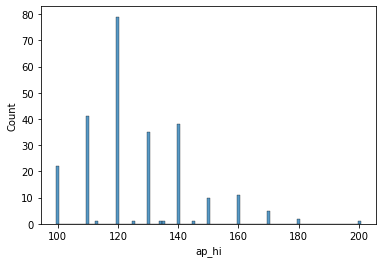

In [102]:
sns.histplot(x=dfw_wom['ap_hi'], discrete=True)

In [95]:
mean_men = np.average(df_men['ap_hi']) #среднее генеральной совокупности мужского пола
D_men = s.pvariance(df_men['ap_hi']) # дисперсия генеральной совокупности выборки мужского пола
d_men = s.variance(df_men['ap_hi']) # дисперсия выборки мужского пола
std_men =s.stdev(df_men['ap_hi'])
print('Статистические параметры выборки мужского пола')
print(f'Среднее: {round(mean_wom, 2)}, Дисперсия гс: {round(D_wom, 2)}, Дисперсия выборки: {round(d_wom, 2)}, Стандартное оклонение: {round(std_wom, 2)}')

Статистические параметры выборки мужского пола
Среднее: 126.8, Дисперсия гс: 259.83, Дисперсия выборки: 259.84, Стандартное оклонение: 16.12


In [96]:
# по полученным данным рассчитываем объем выборки
z = 1.96 # доверительный уровень
w = 4 # доверительный интервал
n = int((4 * (z**2) * (std_wom**2))/w**2)
print(f'Размер выборки: {n}')

Размер выборки: 249


In [97]:
# получаем выборку мужчин
dfw_men = df_men.sample(n)
dfw_men.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 16522 to 33191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  249 non-null    object
 1   ap_hi   249 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


#### Оценим статистические значимые различия двух групп 
###### Нулевая гипотеза – средние двух выборок равны, альтернативная гипотеза – средние двух выборок не равны.

In [99]:
from scipy import stats
stats.f_oneway(dfw_wom['ap_hi'],dfw_men['ap_hi'])

F_onewayResult(statistic=4.354428055373827, pvalue=0.03742292841694698)

In [101]:
stats.ttest_ind(dfw_wom['ap_hi'],dfw_men['ap_hi'])

Ttest_indResult(statistic=-2.0867266364749018, pvalue=0.037422928416939526)

#### Вывод. Значение p=0.037, что меньше 0.05. Это означает, что мы отвергаем нулевую гипотезу, т.е. группы имеют разные средние.

In [106]:
#dfs = (n - 1) + (n - 1)
#stats.t.ppf(0.975, dfs)

In [107]:
#stat, p = stats.normaltest(dfw['ap_hi']) # Критерий согласия Пирсона
#print('Statistics=%.3f, p-value=%.3f' % (stat, p))

#alpha = 0.05
#if p > alpha:
#    print('Принять гипотезу о нормальности')
#else:
#    print('Отклонить гипотезу о нормальности')